In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import collections

In [147]:
DATA_PATH = './data/'
with open(DATA_PATH+'importance_scores_group_prediction.pkl','rb') as f:
    imp_group = pickle.load(f)

In [149]:
DATA_PATH = './data/'
with open(DATA_PATH+'importance_scores_stage_prediction.pkl','rb') as f:
    imp_stage = pickle.load(f)

In [150]:
len(imp_stage)

140

In [151]:
scl = imp_stage[0]

In [152]:
scl

,cell_type,X,Y,cell_id,spot_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad
0,granulocytes,77.0,589.0,0,0,0.000000,0.000000,0.0,0.000000,0.00000,0.086678,0.0,0.000000,0.000000,0.000000,0.000000,0.015602
1,granulocytes,106.0,826.0,1,0,0.205527,0.076950,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.004025,0.060734,0.000000,0.047808
2,granulocytes,107.0,545.0,2,0,0.012644,0.171711,0.0,0.061048,0.00000,0.048164,0.0,0.000000,0.124192,0.095211,0.030404,0.049395
3,granulocytes,98.0,564.0,3,0,0.000000,0.000000,0.0,0.008977,0.00000,0.079265,0.0,0.000000,0.005902,0.000000,0.000000,0.013970
4,granulocytes,217.0,329.0,4,0,0.000000,0.000000,0.0,0.000000,0.00000,0.070130,0.0,0.011328,0.000000,0.000000,0.000000,0.013033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,undefined,1686.0,503.0,240084,0,0.000000,0.000000,0.0,0.013270,0.00000,0.075089,0.0,0.000000,0.022157,0.000000,0.000000,0.015472
1160,undefined,1868.0,553.0,240085,0,0.000000,0.099012,0.0,0.064703,0.00000,0.012110,0.0,0.000000,0.037635,0.026430,0.006055,0.026365
1161,tumor cells / immune cells,1310.0,135.0,246598,0,0.000000,0.000000,0.0,0.000000,0.03563,0.089043,0.0,0.000000,0.000000,0.000000,0.000000,0.019948
1162,immune cells / vasculature,1634.0,1242.0,248395,0,0.063656,0.137270,0.0,0.069655,0.00000,0.000000,0.0,0.000000,0.135740,0.164500,0.031828,0.057082


In [153]:
patient_id = 0
for scl in imp_stage:
    # scl.rename(columns = {"graph_id":"spot_id"},inplace=True)
    i = scl.spot_id.unique()[0]
    if i % 4 == 0:
        patient_id += 1
    scl['patient_id'] = patient_id
    cp = pt_data.loc[pt_data.loc[:,'Patient'] == patient_id,'Group'].values[0]
    assert(cp == 1 or cp == 2)
    scl['patient_group'] = cp

In [154]:
scl = imp_stage[32] # look at dataframe for first graph

In [155]:
scl

,cell_type,X,Y,cell_id,spot_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad,patient_id,patient_group
0,granulocytes,177.0,465.0,9831,32,0.083173,0.234000,0.105137,0.204937,0.002782,0.030598,0.005602,0.013096,0.035767,0.008603,0.033182,0.067554,9,2
1,granulocytes,335.0,971.0,9832,32,0.000000,0.000000,0.000000,0.000000,0.072118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012981,9,2
2,granulocytes,361.0,994.0,9833,32,0.000000,0.000000,0.000000,0.000000,0.077793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014003,9,2
3,granulocytes,401.0,1209.0,9834,32,0.097634,0.162869,0.086883,0.100857,0.000000,0.105390,0.000000,0.115408,0.059030,0.000000,0.092258,0.046440,9,2
4,granulocytes,445.0,389.0,9835,32,0.000000,0.003994,0.000000,0.000000,0.177747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031915,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,CD68+ macrophages,1447.0,30.0,255682,32,0.020327,0.116084,0.000000,0.000000,0.136000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039520,9,2
2694,CD68+ macrophages,1477.0,877.0,255683,32,0.131252,0.388209,0.215584,0.211326,0.000000,0.151422,0.162578,0.219393,0.209493,0.164951,0.187222,0.063380,9,2
2695,CD68+ macrophages,1506.0,185.0,255684,32,0.000000,0.026901,0.000000,0.000000,0.070699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015616,9,2
2696,CD68+ macrophages,1538.0,164.0,255685,32,0.000000,0.026777,0.000000,0.000000,0.083837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017698,9,2


In [156]:
imp_stage_df = pd.concat(imp_stage)

In [157]:
imp_stage_df

,cell_type,X,Y,cell_id,spot_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad,patient_id,patient_group
0,granulocytes,77.0,589.0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.086678,0.000000,0.000000,0.000000,0.000000,0.000000,0.015602,1,1
1,granulocytes,106.0,826.0,1,0,0.205527,0.076950,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004025,0.060734,0.000000,0.047808,1,1
2,granulocytes,107.0,545.0,2,0,0.012644,0.171711,0.0,0.061048,0.000000,0.048164,0.000000,0.000000,0.124192,0.095211,0.030404,0.049395,1,1
3,granulocytes,98.0,564.0,3,0,0.000000,0.000000,0.0,0.008977,0.000000,0.079265,0.000000,0.000000,0.005902,0.000000,0.000000,0.013970,1,1
4,granulocytes,217.0,329.0,4,0,0.000000,0.000000,0.0,0.000000,0.000000,0.070130,0.000000,0.011328,0.000000,0.000000,0.000000,0.013033,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,immune cells / vasculature,1760.0,340.0,250545,139,0.000000,0.000000,0.0,0.000000,0.350962,0.109427,0.009119,0.000000,0.000000,0.118731,0.000000,0.080530,35,1
1021,immune cells / vasculature,1771.0,379.0,250546,139,0.000000,0.000000,0.0,0.000000,0.390879,0.108796,0.009440,0.000000,0.000000,0.121545,0.000000,0.086404,35,1
1022,immune cells / vasculature,1820.0,534.0,250547,139,0.000000,0.000000,0.0,0.000000,0.439668,0.103302,0.010731,0.000000,0.000000,0.150292,0.000000,0.096413,35,1
1023,NK cells,547.0,71.0,253997,139,0.174553,0.000000,0.0,0.000000,0.000000,0.109509,0.000256,0.000000,0.000000,0.248823,0.000000,0.074588,35,1


In [158]:
imp_stage_df.to_csv(DATA_PATH+'importance_scores_stage_prediction.csv')

In [160]:
imp_stage_df = pd.read_csv(DATA_PATH+'importance_scores_stage_prediction.csv')

In [161]:
imp_group_df = pd.read_csv(DATA_PATH+'importance_scores_group_prediction.csv')

In [162]:
imp_group_df

,Unnamed: 0,cell_type,X,Y,cell_id,spot_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad,patient_id,patient_group
0,0,granulocytes,77.0,589.0,0,0,0.016950,0.350585,0.000000,0.116528,0.140501,0.017379,0.099837,0.129521,0.024781,0.007914,0.124601,0.076995,1,1
1,1,granulocytes,106.0,826.0,1,0,0.014687,0.075043,0.240120,0.269666,0.001379,0.047645,0.000000,0.006499,0.023416,0.148588,0.035362,0.082052,1,1
2,2,granulocytes,107.0,545.0,2,0,0.068091,0.000000,0.000000,0.030736,0.028675,0.017152,0.000000,0.099696,0.010412,0.000000,0.078084,0.025059,1,1
3,3,granulocytes,98.0,564.0,3,0,0.007142,0.281647,0.000000,0.060714,0.322154,0.054891,0.217566,0.138132,0.020155,0.000000,0.036945,0.103708,1,1
4,4,granulocytes,217.0,329.0,4,0,0.252161,0.901895,0.414942,0.469559,0.380645,0.344093,0.475564,0.249722,0.201604,0.044381,0.152361,0.155064,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258380,1020,immune cells / vasculature,1760.0,340.0,250545,139,0.028843,0.000000,0.041830,0.013085,0.096057,0.058998,0.085951,0.000000,0.000000,0.040406,0.034624,0.028131,35,1
258381,1021,immune cells / vasculature,1771.0,379.0,250546,139,0.000000,0.000000,0.000000,0.000000,0.000000,0.085537,0.033606,0.000000,0.000000,0.039697,0.000000,0.022238,35,1
258382,1022,immune cells / vasculature,1820.0,534.0,250547,139,0.011755,0.000000,0.021281,0.000000,0.000000,0.030186,0.217851,0.062268,0.024682,0.034050,0.022981,0.039941,35,1
258383,1023,NK cells,547.0,71.0,253997,139,0.000000,0.004622,0.079945,0.065453,0.023014,0.013056,0.000000,0.000000,0.000000,0.077384,0.008839,0.028748,35,1


In [163]:
imp_stage_df

,Unnamed: 0,cell_type,X,Y,cell_id,spot_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad,patient_id,patient_group
0,0,granulocytes,77.0,589.0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.086678,0.000000,0.000000,0.000000,0.000000,0.000000,0.015602,1,1
1,1,granulocytes,106.0,826.0,1,0,0.205527,0.076950,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004025,0.060734,0.000000,0.047808,1,1
2,2,granulocytes,107.0,545.0,2,0,0.012644,0.171711,0.0,0.061048,0.000000,0.048164,0.000000,0.000000,0.124192,0.095211,0.030404,0.049395,1,1
3,3,granulocytes,98.0,564.0,3,0,0.000000,0.000000,0.0,0.008977,0.000000,0.079265,0.000000,0.000000,0.005902,0.000000,0.000000,0.013970,1,1
4,4,granulocytes,217.0,329.0,4,0,0.000000,0.000000,0.0,0.000000,0.000000,0.070130,0.000000,0.011329,0.000000,0.000000,0.000000,0.013033,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258380,1020,immune cells / vasculature,1760.0,340.0,250545,139,0.000000,0.000000,0.0,0.000000,0.350962,0.109427,0.009119,0.000000,0.000000,0.118731,0.000000,0.080530,35,1
258381,1021,immune cells / vasculature,1771.0,379.0,250546,139,0.000000,0.000000,0.0,0.000000,0.390879,0.108796,0.009440,0.000000,0.000000,0.121545,0.000000,0.086404,35,1
258382,1022,immune cells / vasculature,1820.0,534.0,250547,139,0.000000,0.000000,0.0,0.000000,0.439668,0.103302,0.010731,0.000000,0.000000,0.150292,0.000000,0.096413,35,1
258383,1023,NK cells,547.0,71.0,253997,139,0.174553,0.000000,0.0,0.000000,0.000000,0.109509,0.000256,0.000000,0.000000,0.248823,0.000000,0.074588,35,1


In [128]:
scl.attrs

{'pred_0': 3.0,
 'pred_1': 3.0,
 'pred_2': 3.0,
 'pred_3': 3.0,
 'pred_4': 4.0,
 'pred_5': 3.0,
 'pred_6': 3.0,
 'pred_7': 3.0,
 'pred_8': 3.0,
 'pred_9': 3.0,
 'stage': 3.0}

In [131]:
stage_preds = {}
for scl in imp_stage:
    i = scl.spot_id.unique()[0]
    stage_preds[i] = scl.attrs
with open(DATA_PATH + 'stage_preds.pkl','wb') as f:
    pickle.dump(stage_preds,f)

In [143]:
group_preds = {}
for scl in imp_group:
    i = scl.spot_id.unique()[0]
    attrs = scl.attrs
    for k,v in attrs.items():
        if k != 'group':
            attrs[k] = v.item()
    group_preds[i] = attrs
with open(DATA_PATH + 'group_preds.pkl','wb') as f:
    pickle.dump(group_preds,f)

In [142]:
scl.attrs['pred_0'].item()

1

In [144]:
group_preds

{0: {'group': 1,
  'pred_0': 1,
  'pred_1': 1,
  'pred_2': 1,
  'pred_3': 1,
  'pred_4': 1,
  'pred_5': 1,
  'pred_6': 1,
  'pred_7': 1,
  'pred_8': 1,
  'pred_9': 1},
 1: {'group': 1,
  'pred_0': 1,
  'pred_1': 1,
  'pred_2': 1,
  'pred_3': 1,
  'pred_4': 1,
  'pred_5': 1,
  'pred_6': 1,
  'pred_7': 1,
  'pred_8': 1,
  'pred_9': 1},
 2: {'group': 1,
  'pred_0': 1,
  'pred_1': 1,
  'pred_2': 1,
  'pred_3': 1,
  'pred_4': 1,
  'pred_5': 1,
  'pred_6': 1,
  'pred_7': 1,
  'pred_8': 1,
  'pred_9': 1},
 3: {'group': 1,
  'pred_0': 1,
  'pred_1': 1,
  'pred_2': 1,
  'pred_3': 1,
  'pred_4': 1,
  'pred_5': 1,
  'pred_6': 1,
  'pred_7': 1,
  'pred_8': 1,
  'pred_9': 1},
 4: {'group': 2,
  'pred_0': 2,
  'pred_1': 2,
  'pred_2': 2,
  'pred_3': 2,
  'pred_4': 2,
  'pred_5': 2,
  'pred_6': 2,
  'pred_7': 2,
  'pred_8': 2,
  'pred_9': 2},
 5: {'group': 2,
  'pred_0': 2,
  'pred_1': 2,
  'pred_2': 2,
  'pred_3': 2,
  'pred_4': 2,
  'pred_5': 2,
  'pred_6': 2,
  'pred_7': 2,
  'pred_8': 2,
  'pred_

### Correlation of median and MAD

In [109]:
import scipy.stats as stats

stats.pearsonr(importance_scores.loc[:,'campp_median'].values,importance_scores.loc[:,'campp_mad'].values)

# double check this

(0.6822224441492671, 0.0)

In [21]:
scl.loc[:,'campp_median'].values

array([0.13232525, 0.01682023, 0.00907956, ..., 0.05581832, 0.17314517,
       0.        ], dtype=float32)

In [22]:
scl.loc[:,'campp_median']

0       0.132325
1       0.016820
2       0.009080
3       0.217490
4       0.029731
          ...   
1159    0.009565
1160    0.034728
1161    0.055818
1162    0.173145
1163    0.000000
Name: campp_median, Length: 1164, dtype: float32

In [110]:
stats.spearmanr(importance_scores.loc[:,'campp_median'].values,importance_scores.loc[:,'campp_mad'].values)

SpearmanrResult(correlation=0.7385660715818451, pvalue=0.0)

In [13]:
def perm_test(a,b,metric=stats.pearsonr,n=1000,rng=np.random.default_rng(1234)):
    true_metric = metric(a,b)[0]
    perms = []
    for _ in range(n):
        rng.shuffle(a)
        perms.append(metric(a,b)[0])
    q = np.sum(np.sort(perms) <= true_metric) / n
    return true_metric,perms,q

In [57]:
_,_,q = perm_test(scl.loc[:,'campp_median'].values,scl.loc[:,'campp_mad'].values,n=10000)

In [58]:
q

0.6054

This does not seem to be totally stable. Either way, it does seem like we have homoscedasticity here (no trend in MAD correlated with the median scores) which is good. I guess I also need to check all graphs, technically.

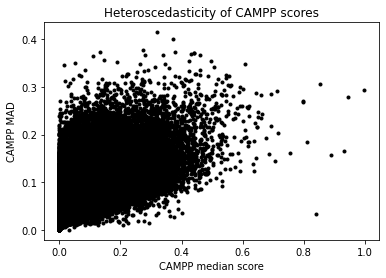

In [173]:
plt.plot(imp_group_df.campp_median, imp_group_df.campp_mad,'k.')
plt.xlabel('CAMPP median score')
plt.ylabel('CAMPP MAD')
plt.title('Heteroscedasticity of CAMPP scores')
plt.savefig(DATA_PATH+'heteroscedasticity.png')
plt.show()

### ANOVA of median scores

In [61]:
from scipy.stats import f_oneway

In [75]:
f_oneway(*[scl.loc[scl['cell_type'] == cell_type]['campp_median'].values for cell_type in scl['cell_type'].unique()])

F_onewayResult(statistic=38.93901789925754, pvalue=2.2062610198085543e-132)

In [65]:
samples = [scl.loc[scl['cell_type'] == cell_type]['campp_median'].values for cell_type in scl['cell_type'].unique()]

In [76]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [177]:
res_group = pairwise_tukeyhsd(imp_group_df['campp_median'], imp_group_df['cell_type'])
res_stage = pairwise_tukeyhsd(imp_stage_df['campp_median'], imp_stage_df['cell_type'])

/home/joeleliason/anaconda3/envs/hactnet/lib/python3.7/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


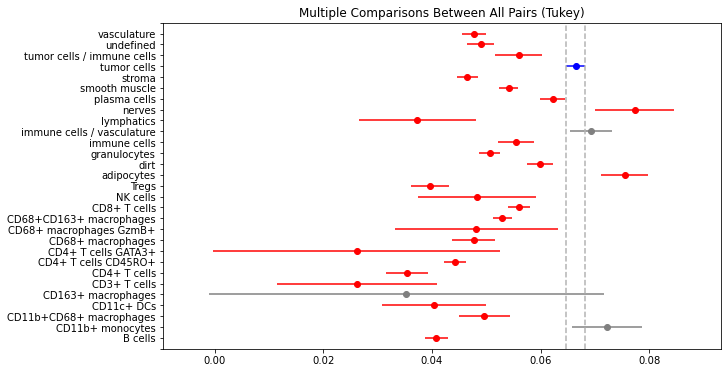

In [182]:
res_group.plot_simultaneous(comparison_name='tumor cells')
plt.savefig(DATA_PATH+'ci_campp_group.png')
plt.show()

/home/joeleliason/anaconda3/envs/hactnet/lib/python3.7/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


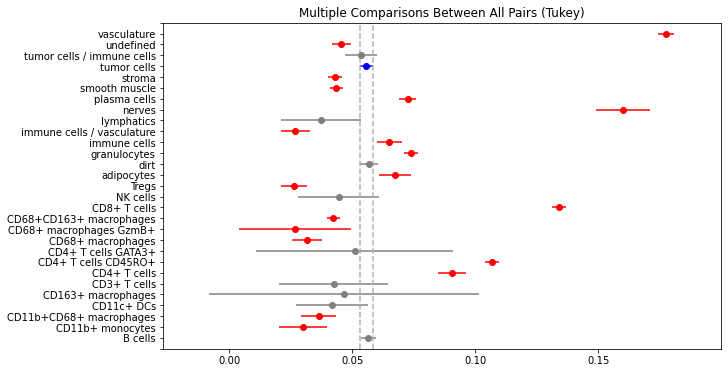

In [183]:
res_stage.plot_simultaneous(comparison_name='tumor cells')
plt.savefig(DATA_PATH+'ci_campp_stage.png')
plt.show()

In [88]:
pt_data = pd.read_excel(DATA_PATH+'CRC_TMAs_patient_annotations.xlsx')

/home/joeleliason/anaconda3/envs/hactnet/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


In [103]:
patient_id = 0
# new_scores_per_graph = []
for scl in imp_groupy:
    # scl = scl1.copy()
    i = scl.spot_id.unique()[0]
    if i % 4 == 0:
        patient_id += 1
    scl['patient_id'] = patient_id
    cp = pt_data.loc[pt_data.loc[:,'Patient'] == patient_id,'Group'].values[0]
    assert(cp == 1 or cp == 2)
    scl['patient_group'] = cp
    # new_scores_per_graph.append(scl)

In [111]:
scl = scores_per_graph[0]

In [112]:
scl.attrs

{'group': 1,
 'pred_0': tensor(1),
 'pred_1': tensor(1),
 'pred_2': tensor(1),
 'pred_3': tensor(1),
 'pred_4': tensor(1),
 'pred_5': tensor(1),
 'pred_6': tensor(1),
 'pred_7': tensor(1),
 'pred_8': tensor(1),
 'pred_9': tensor(1)}

In [104]:
importance_scores = pd.concat(scores_per_graph)

In [105]:
importance_scores

,cell_type,X,Y,cell_id,spot_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad,patient_id,patient_group
0,granulocytes,77.0,589.0,0,0,0.016950,0.350585,0.000000,0.116528,0.140501,0.017379,0.099837,0.129521,0.024781,0.007914,0.124601,0.076995,1,1
1,granulocytes,106.0,826.0,1,0,0.014687,0.075043,0.240120,0.269666,0.001379,0.047645,0.000000,0.006499,0.023416,0.148588,0.035362,0.082052,1,1
2,granulocytes,107.0,545.0,2,0,0.068091,0.000000,0.000000,0.030736,0.028675,0.017152,0.000000,0.099696,0.010412,0.000000,0.078084,0.025059,1,1
3,granulocytes,98.0,564.0,3,0,0.007142,0.281647,0.000000,0.060714,0.322154,0.054891,0.217566,0.138132,0.020155,0.000000,0.036945,0.103708,1,1
4,granulocytes,217.0,329.0,4,0,0.252162,0.901895,0.414942,0.469559,0.380645,0.344093,0.475564,0.249722,0.201604,0.044381,0.152361,0.155064,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,immune cells / vasculature,1760.0,340.0,250545,139,0.028843,0.000000,0.041830,0.013085,0.096057,0.058998,0.085951,0.000000,0.000000,0.040406,0.034624,0.028131,35,1
1021,immune cells / vasculature,1771.0,379.0,250546,139,0.000000,0.000000,0.000000,0.000000,0.000000,0.085537,0.033606,0.000000,0.000000,0.039697,0.000000,0.022238,35,1
1022,immune cells / vasculature,1820.0,534.0,250547,139,0.011755,0.000000,0.021281,0.000000,0.000000,0.030186,0.217851,0.062268,0.024682,0.034050,0.022981,0.039941,35,1
1023,NK cells,547.0,71.0,253997,139,0.000000,0.004622,0.079945,0.065453,0.023014,0.013056,0.000000,0.000000,0.000000,0.077384,0.008839,0.028748,35,1


In [106]:
importance_scores.to_csv(DATA_PATH+'importance_scores_group_prediction.csv')

In [91]:
scl.spot_id.unique()[0]

array([32])

MAD based on cell type


In [ ]:
importance_scores.loc[]